# take2

**GOAL**: Keep It Stupid Simple = KISS.

**Dependencies:**
 - [pocketknives](https://github.com/zjwilliams20/pocketknives)

**References:**
 1. [ilqgames/python](https://github.com/HJReachability/ilqgames/blob/master/python)

**TODO**:
- quantify run times
- figure out overflow
- make sure quadcopter converges

In [1]:
from time import perf_counter as pc
import warnings

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from decentralized import split_agents, plot_solve
import decentralized as dec
import pocketknives

π = np.pi

In [2]:
%load_ext autoreload
%autoreload 1
%aimport decentralized.control, decentralized.dynamics, decentralized.cost, \
    decentralized.problem, decentralized.util, decentralized.decentralized

In [3]:
%matplotlib ipympl
plt.rcParams['axes.grid'] = True

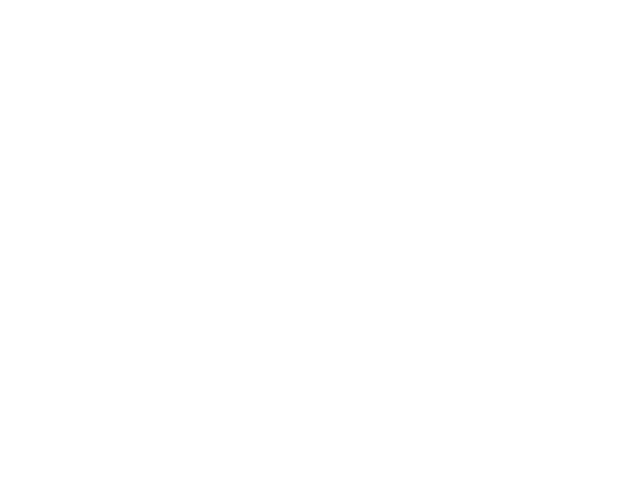

In [5]:
# fig = plt.figure(figsize=(3.7, 3.7))
fig = plt.figure()

## single-agent problem

In [6]:
dt = 0.05
N = 50
n_d = 2

x = np.array([-10, 10, 10, 0], dtype=float)
x_goal = np.zeros((4, 1), dtype=float).T

# dynamics = dec.DoubleIntDynamics4D(dt)
dynamics = dec.UnicycleDynamics4D(dt)

Q = np.diag([1., 1, 0, 0])
Qf = 1000 * np.eye(Q.shape[0])
R = np.eye(2)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)
X, U, J = ilqr.solve(x)

plt.clf()
plot_solve(X, J, x_goal)
plt.draw()

0/50	J: 432856
1/50	J: 4390.34	μ: 0.5	Δ: 0.5
2/50	J: 4096.25	μ: 0.125	Δ: 0.25
3/50	J: 3473.42	μ: 0.015625	Δ: 0.125
4/50	J: 3428.29	μ: 0.000976562	Δ: 0.0625
5/50	J: 3371.06	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 3263.24	μ: 0	Δ: 0.015625
7/50	J: 3236.37	μ: 0	Δ: 0.0078125
8/50	J: 3211.05	μ: 0	Δ: 0.00390625
9/50	J: 3206.25	μ: 0	Δ: 0.00195312
10/50	J: 3198.65	μ: 0	Δ: 0.000976562


In [7]:
prob

ilqrProblem(
	UnicycleDynamics4D(n_x: 4, n_u: 2, id: 0),
	ReferenceCost(
	Q: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]],
	R: [[1. 0.]
 [0. 1.]],
	Qf: [[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]],
	id: 0
)
)

Show equations of motion, which have the form

$$\dot{x} = f(x, u, p)$$

for states

$$
x = \begin{bmatrix} o_x & o_y & o_z & \psi & \theta & \phi & v_x & v_y & v_z & w_x & w_y & w_z \end{bmatrix},
$$

inputs
$$
u = \begin{bmatrix} \tau_x & \tau_y & \tau_z & f_z \end{bmatrix},
$$

and parameters
$$
p = \begin{bmatrix} m & J_x & J_y & J_z & g \end{bmatrix}.
$$

In [6]:
# Single-agent problem for a 12D quadcopter (w/ analytical diff.)
dt = 0.1
N = 40
n_d = 3

x = np.array([2, 2, 0.5 , 0.05, 0, 0, 0.0, 0.0, 0, 0, 0, 0], dtype=float)
x_goal = np.zeros((12, 1), dtype=float).T

dynamics = dec.QuadcopterDynamics12D(dt)

# Q = np.diag([1., 1., 1., 0, 0, 0, 0, 0, 0, 0, 0, 0])
Q = np.diag([1., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Qf = 100 * np.eye(Q.shape[0])
R = np.eye(4)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)

# with warnings.catch_warnings():
    # warnings.filterwarnings("error")
X, U, J = ilqr.solve(x)

plt.clf()
plot_solve(X, J, x_goal, n_d=n_d)
plt.draw()

0/50	J: 828200
1/50	J: 201717	μ: 0.5	Δ: 0.5
2/50	J: 21847	μ: 0.125	Δ: 0.25
3/50	J: 556.517	μ: 0.015625	Δ: 0.125
4/50	J: 231.79	μ: 0.000976562	Δ: 0.0625
5/50	J: 177.952	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 152.816	μ: 0	Δ: 0.015625
7/50	J: 151.208	μ: 0	Δ: 0.0078125
8/50	J: 142.319	μ: 0	Δ: 0.00390625
9/50	J: 139.107	μ: 0	Δ: 0.00195312
10/50	J: 135.074	μ: 0	Δ: 0.000976562
11/50	J: 132.781	μ: 0	Δ: 0.000488281
12/50	J: 131.395	μ: 0	Δ: 0.000244141
13/50	J: 130.306	μ: 0	Δ: 0.00012207
14/50	J: 129.877	μ: 0	Δ: 6.10352e-05
15/50	J: 129.426	μ: 0	Δ: 3.05176e-05


In [5]:
# Single-agent problem for a 6D quadcopter (w/ analytical diff.)
dt = 0.1
N = 40
n_d = 3

x = np.array([2, 2, 0.5 , 0, 0, 0], dtype=float)
x_goal = np.zeros((6, 1), dtype=float).T

dynamics = dec.QuadcopterDynamics6D(dt)

# Q = np.diag([1., 1., 1., 0, 0, 0, 0, 0, 0, 0, 0, 0])
Q = np.diag([1., 1., 1., 1., 1., 1.])
Qf = 100 * np.eye(Q.shape[0])
R = np.eye(3)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)

# with warnings.catch_warnings():
    # warnings.filterwarnings("error")
X, U, J = ilqr.solve(x)

plt.clf()
plot_solve(X, J, x_goal, n_d=n_d)
plt.draw()

0/50	J: 827632
1/50	J: 3912.54	μ: 0.5	Δ: 0.5
2/50	J: 3857.8	μ: 0.125	Δ: 0.25


## multi-agent problem

### initializing the scene
Here, we define some initial positions within some distance of each other, and then rotate them about the origin by some random angle to hopefully create some interesting scenarios.

In [4]:
def paper_setup():
    """Hardcoded example with reasonable consistency eyeballed from 
       Potential-iLQR paper
    """
    x0 = np.array([[0.5, 1.5, 0, 0.1,
                    2.5, 1.5, 0, π,
                    1.5, 1.3, 0, π/2]], 
                     dtype=float).T
    x_goal = np.array([[2.5, 1.5, 0, 0, 
                        0.5, 1.5, 0, π, 
                        1.5, 2.2, 0, π/2]]).T
    return x0, x_goal

def dec_test_setup():
    x0, x_goal = paper_setup()
    x0_other = np.array([[5, 5, 0, 0,
                          6, 6, 0, π/4]]).T
    x_goal_other = np.array([[6, 4, 0, -π/2,
                              4, 6, 0, π/4]]).T
    
    x0 = np.concatenate([x0, x0_other]) 
    x_goal = np.concatenate([x_goal, x_goal_other])    
    
    return x0, x_goal

To be consistent between simulations, we normalize for the scale of the setup by computing the *energy*, or the sum of distances from the origin of the points. This should be the same for all runs.

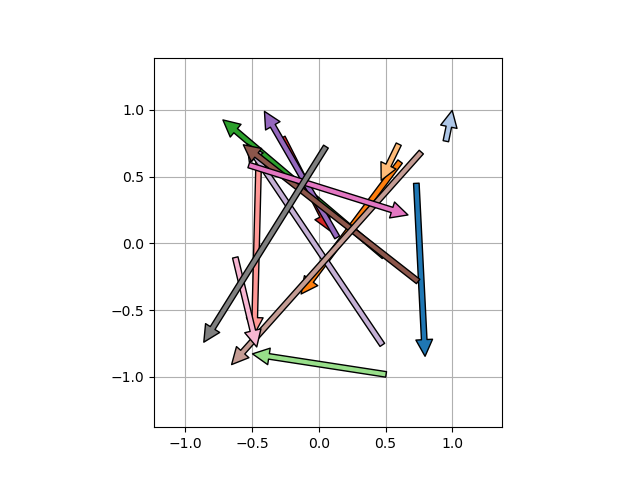

In [5]:
n_agents = 15
n_states = 6
n_controls = 3
ENERGY = 10.0
n_d = 3

# x0, x_goal = paper_setup()
# x0, x_goal = car_setup()
# x0, x_goal = bike_setup()
# x0, x_goal = double_int_setup()
# x0, x_goal = dec_test_setup()
x0, x_goal = dec.random_setup(
    n_agents, n_states, 
    is_rotation=False, 
    rel_dist=2.0, 
    var=1.0, 
    n_d=n_d, 
    random=True
)

x_dims = [n_states] * n_agents
u_dims = [n_controls] * n_agents

# x0 = dec.normalize_energy(x0, x_dims, ENERGY)
# x_goal = dec.normalize_energy(x_goal, x_dims, ENERGY)
# x0 = dec.perturb_state(x0, x_dims)

plt.clf()
plt.gca().set_aspect('equal')
X = np.dstack([
    x0.reshape(n_agents, n_states), 
    x_goal.reshape(n_agents, n_states)
]).swapaxes(1,2)
for i, Xi in enumerate(X):
    plt.annotate('', Xi[1,:2], Xi[0,:2], 
                 arrowprops=dict(facecolor=plt.cm.tab20.colors[i]))
pocketknives.set_bounds(X.reshape(-1, n_states), zoom=0.2)
plt.draw()

In [31]:
x0.shape

(90, 1)

In [32]:
n_controls

3

In [9]:
dt = 0.1

tol = 1e-3
ids = [100 + i for i in range(n_agents)]
n_dim = 3
# model = dec.DoubleIntDynamics4D
# model = dec.UnicycleDynamics4D
# model = dec.BikeDynamics5D
model = dec.QuadcopterDynamics6D
dynamics = dec.MultiDynamicalModel([model(dt, id_) for id_ in ids])

Q = 5 * np.diag([10., 10., 10., 10., 10., 10.])
Qf = 1000 * np.eye(Q.shape[0])
R = np.eye(n_controls)

# radius = ENERGY / 20
radius = 0.5

goal_costs = [dec.ReferenceCost(x_goal_i, Q.copy(), R.copy(), Qf.copy(), id_) 
              for x_goal_i, id_ in zip(split_agents(x_goal.T, x_dims), ids)]
prox_cost = dec.ProximityCost(x_dims, radius, n_dim)
game_cost = dec.GameCost(goal_costs, prox_cost)

prob = dec.ilqrProblem(dynamics, game_cost)

In [8]:
#TODO:
#How should I initiate two different dynamcis simultaneously?
dt = 0.1
n_agents_quad = 2 #2 quadcopters, 3 human agents
n_agents_human = 3

tol = 1e-3

ids_1 = [100 + i for i in range(n_agents_quad)]
ids_2 = [200 + i for i in range(n_agents_human)]


n_dim = 3

model1 = dec.QuadcopterDynamics6D
model2 = dec.UnicycleHumanAgent4D
dynamics1 = dec.MultiDynamicalModel([model1(dt, id_) for id_ in ids_1])
# dynamics2 = dec.MultiDynamicalModel([model2(dt, id_) for id_ in ids_2])


In [9]:
dynamics2 = dec.MultiDynamicalModel([model2(dt, id_) for id_ in ids_2])

AttributeError: UnicycleHuman4D

In [13]:
dec.UnicycleHumanAgent4D

decentralized.dynamics.UnicycleHumanAgent4D

In [186]:
prob

ilqrProblem(
	MultiDynamicalModel(
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 100),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 101),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 102),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 103),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 104),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 105),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 106),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 107),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 108),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 109),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 110),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 111),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 112),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 113),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 114)
),
	GameCost(
	ids: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114],
	prox_cost: <decentralized.cost.ProximityCost object at 0x7fb16d9815d0>
)
)

In [187]:
dynamics

MultiDynamicalModel(
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 100),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 101),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 102),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 103),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 104),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 105),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 106),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 107),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 108),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 109),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 110),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 111),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 112),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 113),
	QuadcopterDynamics6D(n_x: 6, n_u: 3, id: 114)
)

In [168]:
# %%time
# ilqr = dec.ilqrSolver(prob, N)
# t0 = pc()
# X, U, J = ilqr.solve(x0, tol=tol, t_kill=None)

In [169]:
# plt.clf()
# plt.figure()
# plot_solve(X, J, x_goal.T, x_dims, n_d)

In [170]:

# plt.figure()
# plt.plot(dec.compute_pairwise_distance(X, x_dims, n_d).T)
# plt.hlines(radius, *plt.xlim(), 'r', ls='--')
# plt.draw()

In [21]:
# costs = []
# for xi, ui in zip(X, U):
#     costs.append(game_cost(xi, ui).item())
# plt.clf()
# plt.plot(costs)
# plt.draw()

## decentralized multi-agent

In [188]:
graph = dec.define_inter_graph_threshold(X, radius, x_dims, ids)
graph

{100: [100, 101, 110],
 101: [100, 101, 105, 108, 111, 114],
 102: [102, 105, 106],
 103: [103, 107, 108, 110, 111, 112, 113, 114],
 104: [104, 107, 110, 112],
 105: [101, 102, 105],
 106: [102, 106],
 107: [103, 104, 107, 108, 110, 111, 112],
 108: [101, 103, 107, 108, 110, 111, 112, 114],
 109: [109, 113],
 110: [100, 103, 104, 107, 108, 110, 112],
 111: [101, 103, 107, 108, 111, 114],
 112: [103, 104, 107, 108, 110, 112, 113],
 113: [103, 109, 112, 113, 114],
 114: [101, 103, 108, 111, 113, 114]}

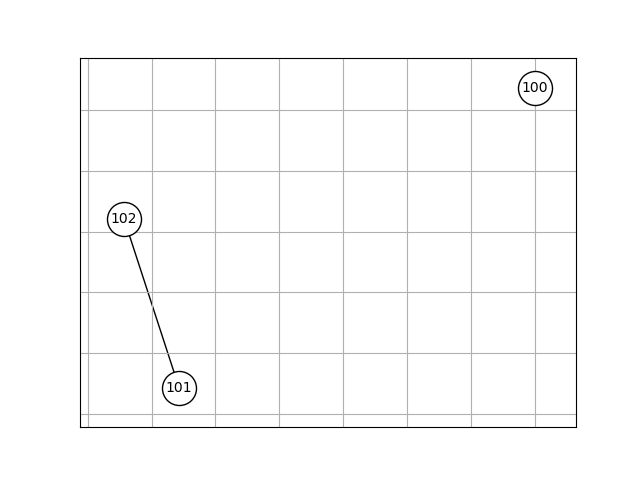

In [28]:
# plt.clf()
# dec.plot_interaction_graph(graph)

In [172]:
# %%time
# X0 = np.tile(x0.T, (N,1))
# U0 = np.zeros((N, n_controls*n_agents))
# X_dec, U_dec, J_dec, solve_times = \
#     dec.solve_decentralized(prob, X0, U0, radius)

In [189]:
# plt.clf()
# plt.figure()
# plot_solve(X_dec, J_dec, x_goal, x_dims, n_d)

In [173]:
# plt.clf()
# plt.plot(dec.compute_pairwise_distance(X_dec, x_dims, n_d).T)
# plt.hlines(radius, *plt.xlim(), 'r', ls='--')
# plt.draw()

## With receding horizon:

In [195]:
x0

array([[-0.866],
       [ 0.121],
       [-0.225],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.273],
       [ 0.289],
       [-0.217],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.755],
       [-0.697],
       [-0.87 ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.477],
       [ 0.203],
       [-0.559],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.47 ],
       [ 0.511],
       [ 0.305],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.975],
       [-0.256],
       [ 0.703],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.91 ],
       [-0.57 ],
       [ 0.696],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.239],
       [-0.613],
       [-0.1  ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.471],
       [-0.164],
       [ 0.934],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.177],
       [-0.331],
       [ 0.864],
       [ 0.   ],
       [ 0.   

In [196]:
x_goal

array([[-0.801],
       [ 0.57 ],
       [ 0.21 ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.627],
       [-0.526],
       [-0.454],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.975],
       [ 0.746],
       [ 0.676],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.687],
       [ 0.858],
       [-0.164],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.058],
       [ 0.836],
       [ 0.465],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.705],
       [ 0.997],
       [-0.127],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.565],
       [-0.871],
       [-0.196],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.742],
       [-0.948],
       [ 0.987],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.364],
       [ 0.44 ],
       [ 0.34 ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.867],
       [-0.071],
       [ 0.115],
       [ 0.   ],
       [ 0.   

In [197]:

%%time
#centralized:
step_size = 3
U0 = np.zeros((N, dynamics.n_u))
N = 50
radius = 0.25
X, U, J = dec.solve_rhc(
    prob, x0, N, radius,
    centralized=True,
    n_d=n_d,
    step_size=step_size, 
    dist_converge=0.1,
    verbose=True,
    t_kill=step_size*dt,
    t_diverge=N*dt
)

t: 0
t: 0.3
t: 0.6
t: 0.9
t: 1.2
t: 1.5
t: 1.8
t: 2.1
t: 2.4
t: 2.7
t: 3
t: 3.3
t: 3.6
t: 3.9
t: 4.2
t: 4.5
t: 4.8
t: 5.1
Failed to converge within allotted time...
CPU times: user 33 s, sys: 500 ms, total: 33.5 s
Wall time: 9.31 s


In [212]:
np.isclose(x0,X[0]) #shouldn't x0 be exactly the same as X[0]??

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

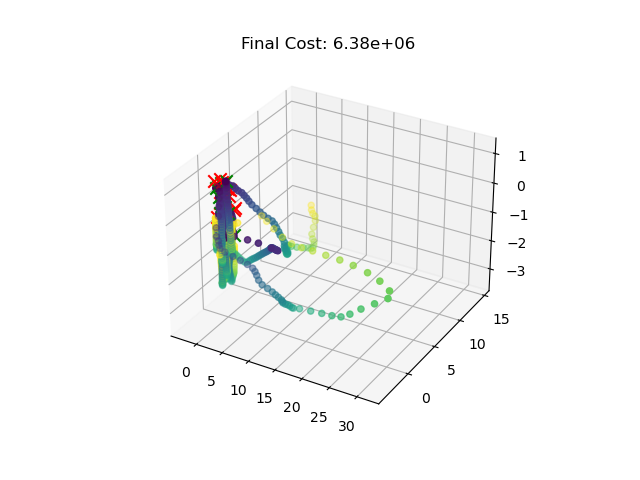

In [199]:
plt.figure(dpi=100)
plot_solve(X, J, x_goal, x_dims, n_d=3)
plt.savefig('/mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/media/Centralized_15_drones.png')

In [208]:
%%time
#Decentralized without multiprocessing:
step_size = 3
U0 = np.zeros((N, dynamics.n_u))
N = 50
radius = 0.25
X, U, J = dec.solve_rhc(
    prob, x0, N, radius,
    centralized=False,
    n_d=n_d,
    step_size=step_size, 
    dist_converge=0.1,
    verbose=True,
    t_kill=step_size*dt,
    t_diverge=N*dt
)

t: 0
================================================================================Interaction Graph: {100: [100], 101: [101, 103], 102: [102], 103: [101, 103], 104: [104], 105: [105], 106: [106], 107: [107], 108: [108], 109: [109], 110: [110], 111: [111], 112: [112], 113: [113], 114: [114]}
Problem 100: [100]
Took 0.023476600006688386 seconds

Problem 101: [101, 103]
Took 0.31400399999984074 seconds

Problem 102: [102]
Took 0.08566719999362249 seconds

Problem 103: [101, 103]
Took 0.32018940000853036 seconds

Problem 104: [104]
Took 0.025722000005771406 seconds

Problem 105: [105]
Took 0.03646659999503754 seconds

Problem 106: [106]
Took 0.024628400002256967 seconds

Problem 107: [107]
Took 0.030698600006871857 seconds

Problem 108: [108]
Took 0.02189600000565406 seconds

Problem 109: [109]
Took 0.022737699997378513 seconds

Problem 110: [110]
Took 0.027482499994221143 seconds

Problem 111: [111]
Took 0.023499399991123937 seconds

Problem 112: [112]
Took 0.025127200002316386 seconds

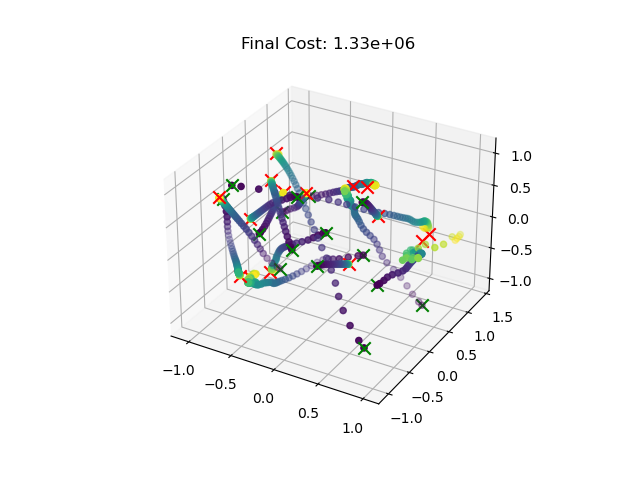

In [194]:
plt.figure()
plot_solve(X, J, x_goal, x_dims, n_d=3)
plt.savefig('/mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/media/decentralized_15_drones.png')

## animation

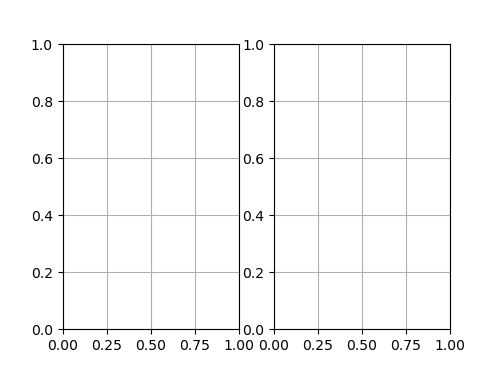

TypeError: 'float' object is not subscriptable

TypeError: 'float' object is not subscriptable

In [36]:
_, axes = plt.subplots(1, 2, figsize=(5.0, 3.7))

In [37]:
def setup(axes, X, x_goal, x_dims, radius):
    
    ax1, ax2 = axes
    n_agents = len(x_dims)
    handles1 = []
    for i in range(n_agents):
        handles1.append((
            ax1.plot(0, c=plt.cm.tab20.colors[2*i], marker='o', markersize=4)[0],
            ax1.add_artist(plt.Circle(np.nan, radius, color='k', fill=True, alpha=0.3, lw=2)),
        ))
        
    for xg in split_agents(x_goal, x_dims):
        ax1.scatter(xg[0,0], xg[0,1], c='r', marker='x', zorder=10)

    X_cat = np.vstack(split_agents(X, x_dims))
    pocketknives.set_bounds(X_cat, axes[0], zoom=0.15)
    plt.draw()
    
    handles2 = []
    n_pairs = pocketknives.nchoosek(n_agents, 2)
    for i in range(n_pairs):
        handles2.append(ax2.plot(0, c=plt.cm.tab20.colors[2*i])[0])
    ax2.hlines(radius, 0, X.shape[0], 'r', ls='--')
    ax2.set_ylim(0.0, distances.max())
        
    return handles1, handles2
    
def animate(t, handles1, handles2, X, x_dims, x_goal, distances):
    """Animate the solution into a gif"""
    
    for (i, xi), hi in zip(enumerate(split_agents(X, x_dims)), handles1):
        hi[0].set_xdata(xi[:t,0])
        hi[0].set_ydata(xi[:t,1])
        hi[1].set_center(xi[t-1,:2])
        
    for i, hi in enumerate(handles2):
        hi.set_xdata(range(t))
        hi.set_ydata(distances[:t, i])
    
    plt.draw()
    

In [38]:
distances = dec.compute_pairwise_distance(X, x_dims).T
handles1, handles2 = setup(axes, X, x_goal.flatten(), x_dims, radius)
animate(10, handles1, handles2, X, x_dims, x_goal, distances)
plt.draw()

AttributeError: module 'pocketknives' has no attribute 'nchoosek'

In [ ]:
handles = setup(axes, X, x_goal.flatten(), x_dims, radius)
anim = FuncAnimation(
    plt.gcf(), 
    animate, 
    frames=N+1, 
    fargs=(*handles, X, x_dims, x_goal, distances))
anim.save('traj.gif', fps=5)

## old

In [39]:
# Old RHC for plotting...
rhc = dec.RecedingHorizonController(x0, ilqr, step_size=5)
U0 = np.zeros((ilqr.N, ilqr.n_u))
for Xi, Ui, Ji in rhc.solve(U0, J_converge=101.0, tol=tol, verbose=False):
    plt.cla()
    plot_solve(Xi, Ji, x_goal.T, x_dims)
    fig.canvas.draw()

--------------------------------------------------
Horizon 0
--------------------------------------------------
Horizon 1
--------------------------------------------------
Horizon 2
--------------------------------------------------
Horizon 3
--------------------------------------------------
Horizon 4
--------------------------------------------------
Horizon 5
--------------------------------------------------
Horizon 6
--------------------------------------------------
Horizon 7
--------------------------------------------------
Horizon 8
--------------------------------------------------
Horizon 9
--------------------------------------------------
Horizon 10
--------------------------------------------------
Horizon 11
--------------------------------------------------
Horizon 12
--------------------------------------------------
Horizon 13
--------------------------------------------------
Horizon 14
--------------------------------------------------
Horizon 15
------------------

KeyboardInterrupt: 

In [41]:
# Manual decentralized RHC for plotting...
step_size = 5
Xi = np.tile(x0.T, (N,1))
Ui = np.zeros((N, dynamics.n_u))
X_dec = np.zeros((0, dynamics.n_x))
U_dec = np.zeros((0, dynamics.n_u))
Ji = np.inf
J_converge = 100.0

while Ji >= J_converge:
    Xi, Ui, Ji = dec.solve_decentralized(prob, Xi, Ui, radius)
    
    X_dec = np.r_[X_dec, Xi[:step_size]]
    U_dec = np.r_[U_dec, Ui[:step_size]]
    
    # Seed the next solve by staying at the last visited state.
    Xi = np.r_[Xi[step_size:], np.tile(Xi[-1], (step_size, 1))]
    Ui = np.r_[Ui[step_size:], np.zeros((step_size, dynamics.n_u))]
    
    plt.cla()
    plot_solve(Xi[:step_size], Ji, x_goal.T, x_dims)
    fig.canvas.draw()

================================================================================Interaction Graph: {100: [100, 102], 101: [101], 102: [100, 102], 103: [103], 104: [104]}
Problem 100: [100, 102]
Took 0.31802650000099675 seconds

Problem 101: [101]
Took 0.024653300000863965 seconds

Problem 102: [100, 102]
Took 0.33756650000032096 seconds

Problem 103: [103]
Took 0.020773000000190223 seconds

Problem 104: [104]
Took 0.06859970000004978 seconds



ValueError: too many values to unpack (expected 3)